<a href="https://colab.research.google.com/github/gtestault/embeddings-demo/blob/main/embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English

## Run me first: installs dependencies

In [2]:
!pip install gensim

In [3]:
!pip install whatlies

In [4]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")
model.save("wiki.kv")

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
from whatlies.language import GensimLanguage
from whatlies import EmbeddingSet, Embedding
lang = GensimLanguage("wiki.kv")

## Explore embeddings, similarity & analogies


In [ ]:
vec = model.get_vector("cow")
print("vector shape: {}".format(vec.shape))
print(vec)

image.png

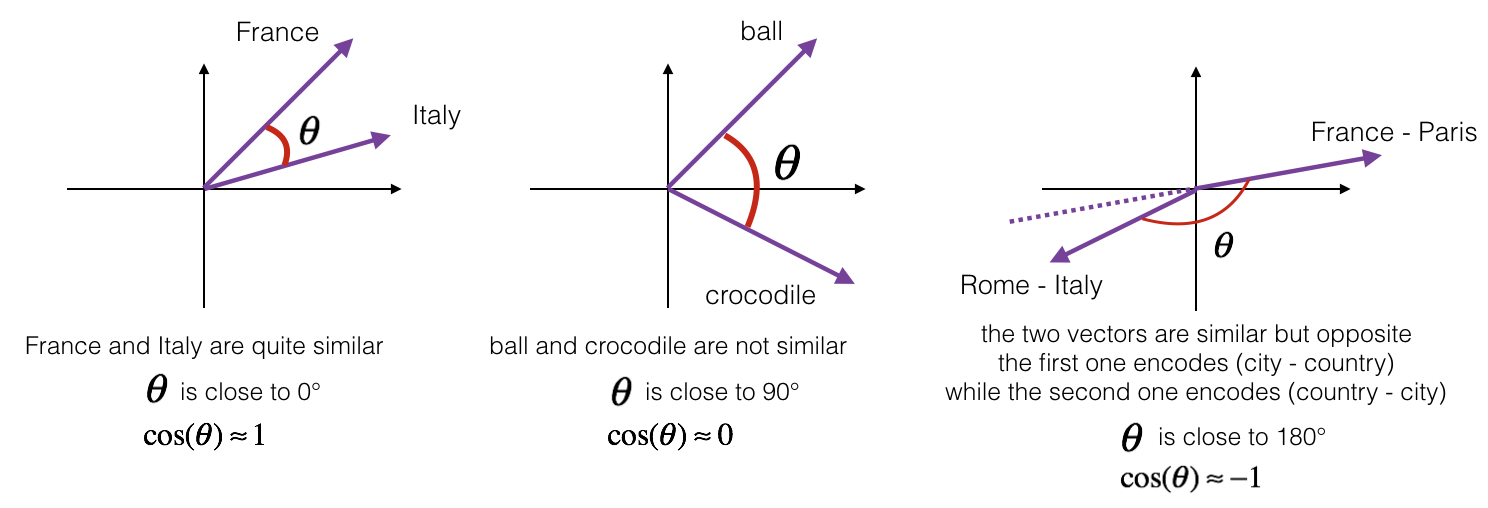
source: [Operations on word vectors by Fisseha Berhane](https://datascience-enthusiast.com/DL/Operations_on_word_vectors.html)

In [ ]:
model.similarity("office", "corporate")

In [ ]:
model.similarity("dog", "cat")

In [ ]:
model.most_similar("cow")

In [ ]:
model.doesnt_match(["jump", "hide", "run", "karaoke"])

Linear algebra with word embeddings

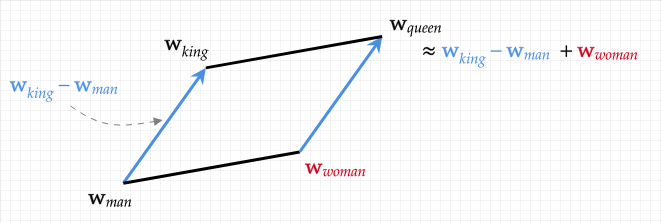

illustration source: https://www.ed.ac.uk/informatics/news-events/stories/2019/king-man-woman-queen-the-hidden-algebraic-struct

In [ ]:
model.most_similar(positive=["woman","king"], negative=["man"], topn=1)

In [10]:
def analogy(model, A, B, C, top=None):
  if (top is not None):
    return model.most_similar(positive=[B, C], negative=[A], topn=top)
  return model.most_similar(positive=[B, C], negative=[A])

In [ ]:
analogy(model, "plain", "cow", "ocean", top=1)

In [ ]:
analogy(model, "germany", "beer", "russia", top=1)

In [ ]:
analogy(model, "cool", "coolest", "tall", top=1)

In [13]:
analogy(model, "talk", "talked", "walk", top=1)

[('walked', 0.8300603628158569)]

In [17]:
analogy(model, "germany", "berlin", "poland", top=1)

[('warsaw', 0.86076420545578)]

In [ ]:
analogy(model, "student", "professor", "girl", top=3)

In [ ]:
analogy(model, "student", "professor", "orphan", top=3)

In [18]:
analogy(model, "car", "porsche", "boat", top=1)

[('yacht', 0.572564423084259)]

Caution: Embeddings amplify bias!

See [Rasa Algorithm Whiteboard: Measuring Bias in Word Embeddings](https://www.youtube.com/watch?v=UwAvyACOrWs) and
 [*Word Embeddings and Gender Stereotypes
in Swedish and English, Rasmus Précenth*](https://www.diva-portal.org/smash/get/diva2:1313459/FULLTEXT01.pdf)



In [19]:
analogy(model, "father", "doctor", "woman", top=1)

[('nurse', 0.6796085834503174)]

## Visualize embeddings with [whatlies](https://github.com/RasaHQ/whatlies)

['dog', 'cat', 'cow', 'yellow', 'green', 'black', 'banking', 'economy', 'market', 'money']


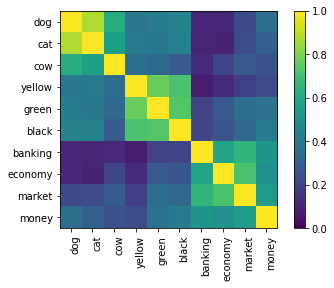

In [20]:
#@title Similarity matrix { run: "auto" }

words = "dog cat cow yellow green black banking economy market money" #@param {type:"string"}
words = words.split()
print(words)
emb = lang[words]
emb.plot_similarity()

['dog', 'cat', 'cow', 'yellow', 'green', 'black', 'banking', 'economy', 'market', 'cereal', 'cocoa', 'rabbit']


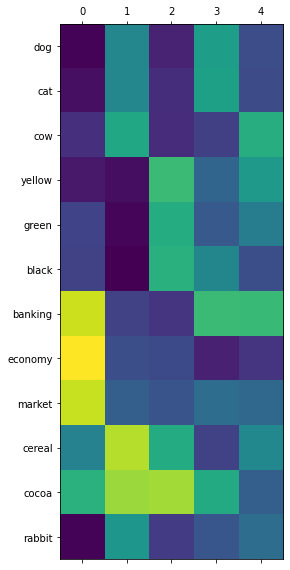

In [22]:
from whatlies.transformers import Pca
#@title PCA { run: "auto" }

words = "dog cat cow yellow green black banking economy market cereal cocoa rabbit" #@param {type:"string"}
dimensions =  5#@param {type:"integer", min: 2}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
print(words)
emb = lang[words].transform(Pca(dimensions))
if dimensions == 3:
  emb.plot_3d(annot=True)
elif dimensions == 2:
  emb.plot()
  emb.plot_distance()
elif dimensions > 3:
  emb.plot_pixels()

EmbSet

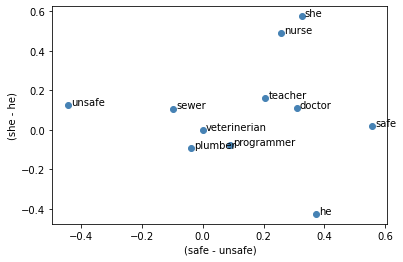

In [44]:
#@title Vector mapping { run: "auto" }

words = "she he safe unsafe nurse doctor veterinerian teacher programmer plumber sewer" #@param {type:"string"}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
emb = lang[words]
goodness = emb["she"] - emb["he"]
safeness = emb["safe"] - emb["unsafe"]

emb.plot(x_axis=safeness, y_axis=goodness, kind="scatter", )

# Deutsch

## Extra: Deutsche Embeddings Spacy


funktionieren leider nicht so gut :(

In [ ]:
!python -m spacy download de_core_news_md

In [ ]:
!pip install whatlies[spacy]

noch mehr Modelle hier: https://spacy.io/models

In [ ]:
from whatlies import EmbeddingSet, Embedding
from whatlies.language import SpacyLanguage
import spacy
nlp = spacy.load("de_core_news_md")
lang = SpacyLanguage(nlp)

In [1]:
from whatlies.transformers import Pca
#@title PCA { run: "auto" }

words = "" #@param {type:"string"}
dimensions =  3#@param {type:"integer", min: 2}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
print(words)
emb = lang[words].transform(Pca(dimensions))
if dimensions == 3:
  emb.plot_3d(annot=True)
elif dimensions == 2:
  emb.plot()
  emb.plot_distance()
elif dimensions > 3:
  emb.plot_pixels()

KeyboardInterrupt: ignored

## Extra: Deutsche Embeddings Fasttext (nicht genug RAM in gratis Colab version)


In [ ]:
!pip install fasttext
import fasttext.util
fasttext.util.download_model('de', if_exists='ignore')

In [ ]:
!pip install -U whatlies

In [ ]:
!pip install whatlies[all]

In [ ]:
from gensim.test.utils import datapath
from gensim.models.fasttext import load_facebook_vectors
vec_path = datapath("/content/cc.de.300.bin")
wv = load_facebook_vectors(vec_path)

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
